In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [3]:
model = keras.models.load_model('model/fashion_mnist')

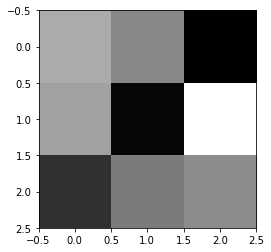

In [28]:
from tensorflow.keras import models

IMAGE = 0 
CONVOLUTION_LAYER = 0
FILTER = 0
# Get filter - get_weights() return filters(0) and bias(1)
layer_weights = [layer.get_weights() for layer in model.layers][CONVOLUTION_LAYER][0]
filter = layer_weights[...,0,FILTER]
# Get output of CONV
img = test_images[IMAGE].reshape(1, 28, 28, 1)
layer_outputs = [layer.output for layer in model.layers][CONVOLUTION_LAYER]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
result = activation_model.predict(img)[0,:,:,FILTER]

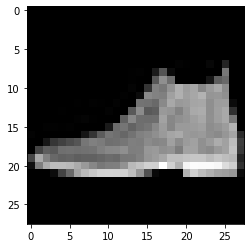

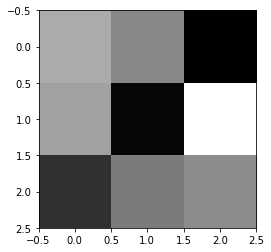

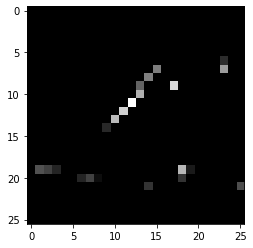

In [29]:
import matplotlib.pyplot as plt
# Show orginal image
plt.figure()
plt.imshow(img.reshape(28,28), cmap='gray')
# Show filter
plt.figure()
plt.imshow(filter, cmap='gray')
# Show image after apply filter
plt.figure()
plt.imshow(result, cmap='gray')